In [224]:
import numpy as np
import pandas as pd

In [225]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [226]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1747,ham,I think u have the wrong number.,NaN,NaN,NaN
2811,ham,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...",NaN,NaN,NaN
3461,spam,Bloomberg -Message center +447797706009 Why wa...,NaN,NaN,NaN
1640,ham,"Alright, we're all set here, text the man",NaN,NaN,NaN
2132,spam,Your B4U voucher w/c 27/03 is MARSMS. Log onto...,NaN,NaN,NaN


In [227]:
df.shape

(5572, 5)

## 1. Data Cleaning 

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [229]:
#gives a summary of a DataFrame including the number of non-null entries, column names, data types, and memory usage.

In [230]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [231]:
#provides summary statistics (like mean, median, std, min, max, and quartiles) for each numerical column in the DataFrame.

In [232]:
#dropping the last three columns by permanently removing it 
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace = True)

In [10]:
df.sample(5)

,v1,v2
3423,spam,Am new 2 club & dont fink we met yet Will B gr...
5304,ham,Pls ask macho how much is budget for bb bold 2...
4570,ham,\CHA QUITEAMUZING THATåÕSCOOL BABE
1733,spam,"Hi, this is Mandy Sullivan calling from HOTMIX..."
439,ham,But i have to. I like to have love and arrange.


In [81]:
#renaming the headings
df.rename(columns = {'v1':'target','v2':'text'}, inplace = True)
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
3752,0,Ya that one is slow as poo,26,7,1,ya one slow poo
4394,0,"Only just got this message, not ignoring you. ...",74,18,3,got messag ignor ye shop
1961,0,LOL that would be awesome payback.,34,7,1,lol would awesom payback
3854,1,Free msg: Single? Find a partner in your area!...,152,31,3,free msg singl find partner area 1000 real peo...
1668,0,"Yes..but they said its IT.,",27,8,1,ye said


In [82]:
#changing values of 'target' with numerical value
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [83]:
df['target'] = encoder.fit_transform(df['target'])
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
3306,0,Set a place for me in your heart and not in yo...,148,32,2,set place heart mind mind easili forget heart ...
5003,0,There's someone here that has a year &lt;#&gt...,247,65,4,someon year lt gt toyota camri like mr olayiwo...
367,1,Here is your discount code RP176781. To stop f...,129,19,4,discount code rp176781 stop messag repli stop ...
4899,1,"ou are guaranteed the latest Nokia Phone, a 40...",146,30,3,ou guarante latest nokia phone 40gb ipod mp3 p...
3775,0,Ok lor. Msg me b4 u call.,25,9,2,ok lor msg b4 u call


In [84]:
#checking for missing values 
df.isnull().sum()

target              0
text                0
num_characters      0
num_words           0
num_sentences       0
transformed_text    0
dtype: int64

In [85]:
#checking for duplicate values 
df.duplicated().sum()

np.int64(0)

In [86]:
#removing the duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [87]:
df.shape

(5169, 6)

## 2. EDA

In [88]:
df['target'].value_counts()
#spam = 1, ham = 0

target
0    4516
1     653
Name: count, dtype: int64

In [89]:
import matplotlib.pyplot as plt

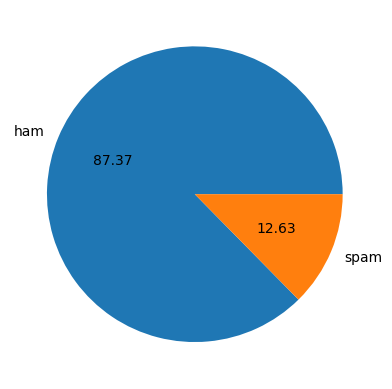

In [90]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()
#data is imbalanced

In [91]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [92]:
df['num_characters'] = df['text'].apply(len)

In [93]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [94]:
# finding number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [95]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [96]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [233]:
#adds a new column counting the number of sentences in each text using NLTK's sentence tokenizer.

In [97]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [98]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [99]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()
#ham

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [100]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()
#spam

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [101]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

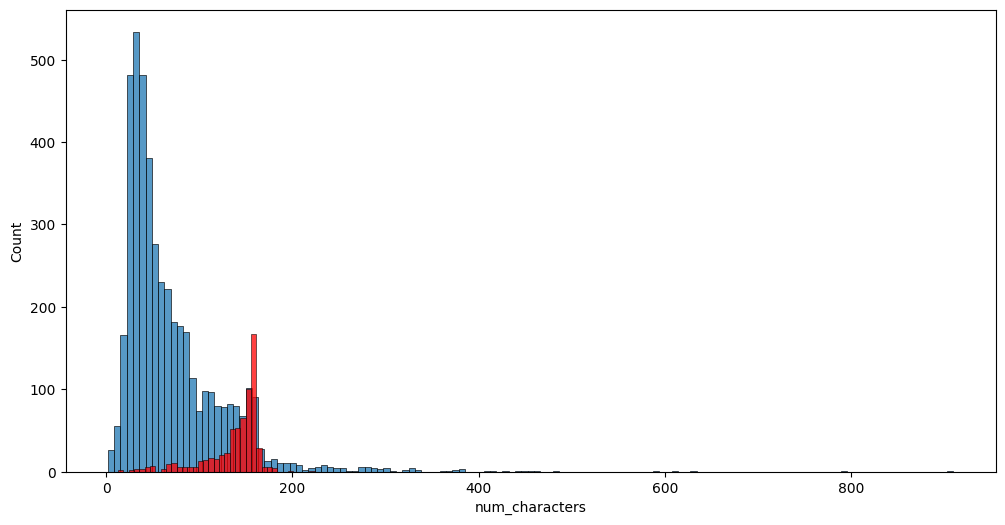

In [102]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

In [234]:
#This code creates an overlapping histogram showing the distribution of num_characters for two classes 
#in the target column—class 0 in default color and class 1 in red—allowing comparison of message lengths
#between the two categories.

<Axes: xlabel='num_words', ylabel='Count'>

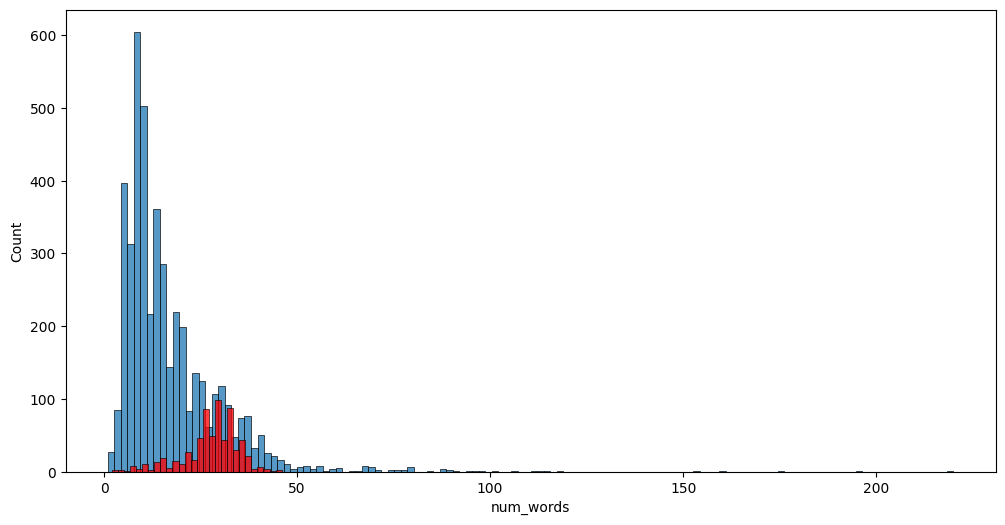

In [103]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

In [104]:
df_num = df.select_dtypes(exclude = ['object']) 

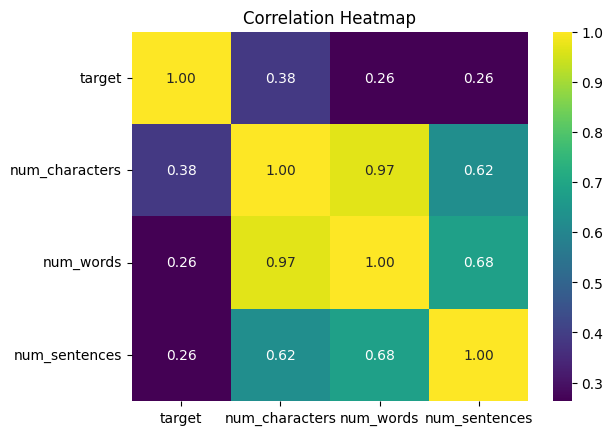

In [105]:
sns.heatmap(df_num.corr(), annot = True, cmap = 'viridis', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

## 3. Data Preprocessing
1.Lower case
2.Tokenization
3.Removing special characters
4.Removing stop words and punctuation
5.Stemming

In [106]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [107]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('caring')

'care'

In [108]:
from nltk.corpus import stopwords
import string

In [109]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
df['transformed_text'] = df['text'].apply(transform_text)

In [111]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [112]:
#finding out the most used spam words by splitting each word and finding out its length 
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [113]:
len(spam_corpus)

9939

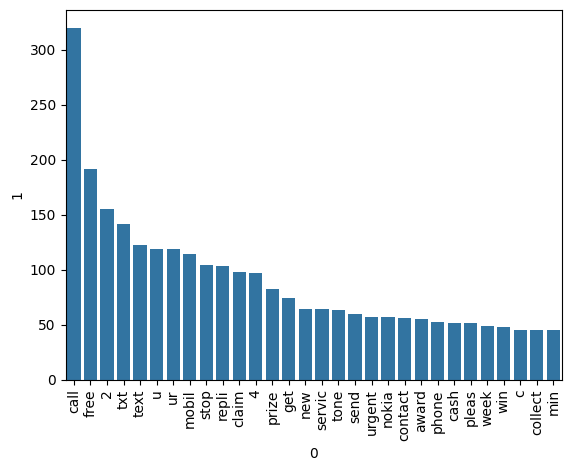

In [114]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [115]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [116]:
len(ham_corpus)

35404

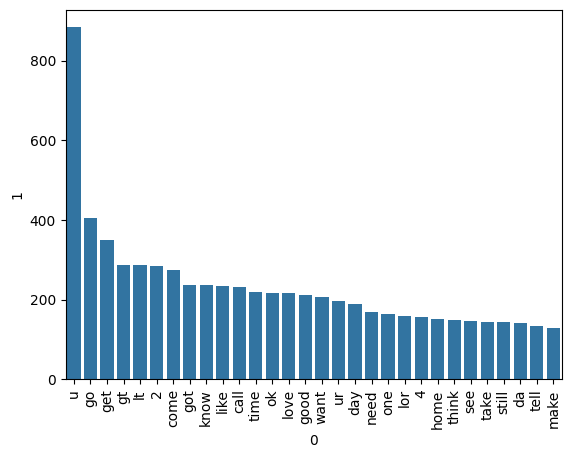

In [117]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [118]:
#you can visualize it as well 
!pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [119]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [120]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

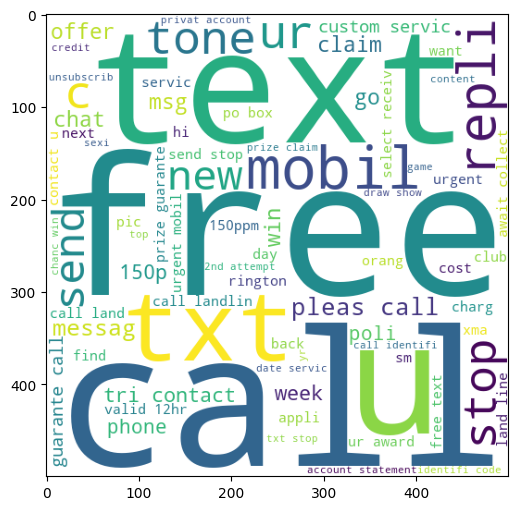

In [121]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [122]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

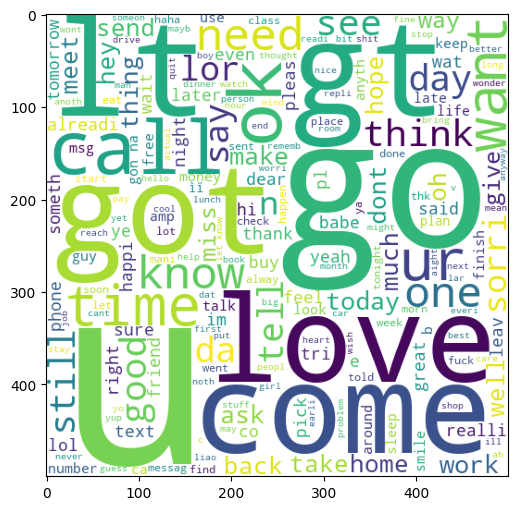

In [123]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

## 4. Model building 
X1 => bag of words, 
X2 => tfidf,
X3 => bunch of other algorithms and scaling

### a. Using bag of words

In [124]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
#bag of words

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [235]:
#This code imports TfidfVectorizer from scikit-learn and creates an instance tfidf,
#which will convert text data into numerical feature vectors based on TF-IDF, 
#capturing the importance of words in a document relative to the whole corpus.

In [126]:
X1 = cv.fit_transform(df['transformed_text']).toarray()

In [127]:
X1.shape

(5169, 6708)

In [128]:
y1 = df['target'].values

In [129]:
y1

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=2)

In [132]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [133]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [134]:
gnb.fit(X1_train,y1_train)
y1_pred1 = gnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred1))
print(confusion_matrix(y1_test,y1_pred1))
print(precision_score(y1_test,y1_pred1))
#precision score is very less

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [135]:
mnb.fit(X1_train,y1_train)
y1_pred2 = mnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred2))
print(confusion_matrix(y1_test,y1_pred2))
print(precision_score(y1_test,y1_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [136]:
bnb.fit(X1_train,y1_train)
y1_pred3 = bnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred3))
print(confusion_matrix(y1_test,y1_pred3))
print(precision_score(y1_test,y1_pred3))
#really good precision score

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


### b. Using tfidf
It works by showing important words by highlighting them while downplaying less important (more common) words.

In [159]:
X2 = tfidf.fit_transform(df['transformed_text']).toarray()
#saving a second copy of the same dataset in a 2nd X - so that it doesnt change/alter the original X 

In [138]:
X2.shape

(5169, 6708)

In [139]:
y2 = df['target'].values

In [140]:
y2

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [141]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=2)

In [160]:
#(a) GNB
gnb.fit(X2_train,y2_train)
y2_pred1 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y2_pred1))
print(confusion_matrix(y2_test,y2_pred1))
print(precision_score(y2_test,y2_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [161]:
#(b) MNB
mnb.fit(X2_train,y2_train)
y2_pred2 = mnb.predict(X2_test)
print(accuracy_score(y2_test,y2_pred2))
print(confusion_matrix(y2_test,y2_pred2))
print(precision_score(y2_test,y2_pred2))
#0 false-positive values now

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [162]:
#(c) BNB
bnb.fit(X2_train,y2_train)
y2_pred3 = bnb.predict(X2_test)
print(accuracy_score(y2_test,y2_pred3))
print(confusion_matrix(y2_test,y2_pred3))
print(precision_score(y2_test,y2_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [238]:
#tfids --> MNB# - best until now (IT WILL CHANGE, for the plot)

In [239]:
#a bunch of other algorithms

In [176]:
X3 = tfidf.fit_transform(df['transformed_text']).toarray()

In [177]:
y3 = df['target'].values

In [178]:
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,test_size=0.2,random_state=8)

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
#i have removed XGboost from here 

In [180]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [181]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [184]:
def train_classifier(clf,X3_train,y3_train,X3_test,y3_test):
    clf.fit(X3_train,y3_train)
    y_pred = clf.predict(X3_test)
    accuracy = accuracy_score(y3_test,y_pred)
    precision = precision_score(y3_test,y_pred)
    
    return accuracy,precision

In [185]:
train_classifier(svc,X3_train,y3_train,X3_test,y3_test)

(0.9700193423597679, 0.9344262295081968)

In [186]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X3_train,y3_train,X3_test,y3_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9700193423597679
Precision -  0.9344262295081968
For  KN
Accuracy -  0.913926499032882
Precision -  1.0
For  NB
Accuracy -  0.9700193423597679
Precision -  0.9907407407407407
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8076923076923077
For  LR
Accuracy -  0.9545454545454546
Precision -  0.9326923076923077
For  RF
Accuracy -  0.9729206963249516
Precision -  1.0
For  AdaBoost
Accuracy -  0.9177949709864603
Precision -  0.8170731707317073
For  BgC
Accuracy -  0.965183752417795
Precision -  0.8976377952755905
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.9473684210526315


In [208]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [209]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.913926,1.000000
5,RF,0.972921,1.000000
8,ETC,0.977756,0.991379
2,NB,0.970019,0.990741
9,GBDT,0.949710,0.947368
0,SVC,0.970019,0.934426
4,LR,0.955513,0.933333
7,BgC,0.965184,0.897638
6,AdaBoost,0.917795,0.817073
3,DT,0.930368,0.809524


In [210]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [211]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.913926
1,RF,Accuracy,0.972921
2,ETC,Accuracy,0.977756
3,NB,Accuracy,0.970019
4,GBDT,Accuracy,0.949710
5,SVC,Accuracy,0.970019
6,LR,Accuracy,0.955513
7,BgC,Accuracy,0.965184
8,AdaBoost,Accuracy,0.917795
9,DT,Accuracy,0.930368


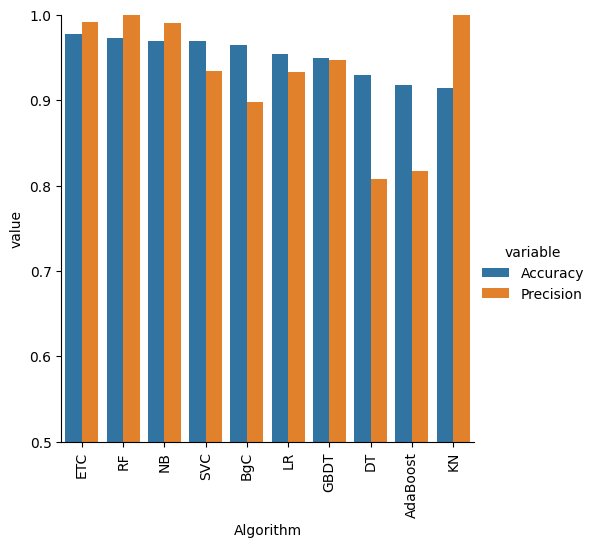

In [206]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [245]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

#This line creates a DataFrame from classifier names (clfs.keys()), their accuracy and
#precision scores, then sorts it in descending order of precision to highlight the 
#best-performing models based on that metric.

In [246]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [254]:
new_df = performance_df.merge(temp_df,on='Algorithm')

#merges performance_df and temp_df on the common column 'Algorithm', combining their data into a 
#single DataFrame (new_df) for easier comparison of model performance across different conditions.

In [249]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [250]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [251]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [252]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling,Accuracy_num_chars_x,Precision_num_chars_x,Accuracy_num_chars_y,Precision_num_chars_y
0,KN,0.913926,1.000000,0.913926,1.000000,0.913926,1.000000,0.913926,1.000000
1,RF,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000
2,ETC,0.977756,0.991379,0.977756,0.991379,0.977756,0.991379,0.977756,0.991379
3,NB,0.970019,0.990741,0.970019,0.990741,0.970019,0.990741,0.970019,0.990741
4,GBDT,0.949710,0.947368,0.949710,0.947368,0.949710,0.947368,0.949710,0.947368
5,SVC,0.970019,0.934426,0.970019,0.934426,0.970019,0.934426,0.970019,0.934426
6,LR,0.955513,0.933333,0.955513,0.933333,0.955513,0.933333,0.955513,0.933333
7,BgC,0.965184,0.897638,0.965184,0.897638,0.965184,0.897638,0.965184,0.897638
8,AdaBoost,0.917795,0.817073,0.917795,0.817073,0.917795,0.817073,0.917795,0.817073
9,DT,0.930368,0.809524,0.930368,0.809524,0.930368,0.809524,0.930368,0.809524


In [253]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))